<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [2]:
from bs4 import BeautifulSoup

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [11]:
##### Your Code Here #####
df = pd.read_csv('./data/job_listings.csv')

print(df.shape)

df.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [12]:
# Get just the text from the html crap
df['description'] = df['description'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip("b'"))

In [13]:
df['description']= df['description'].str.replace(r'(\\(x|n)[a-zA-Z0-9]{0,2})', '')

df['description']

0      "Job Requirements:nceptual understanding in Ma...
1      Job Description a Data Scientist 1, you will h...
2      As a Data Scientist you will be working on con...
3      $4,969 - $6,756 a monthContractUnder the gener...
4      Location: USA  multiple locations+ years of An...
5      Create various Business Intelligence Analytica...
6      As Spotify Premium swells to over 96M subscrib...
7      "Everytown for Gun Safety, the nation's larges...
8      "MS in a quantitative discipline such as Stati...
9      Slack is hiring experienced data scientists to...
10     Who We AreackThorn Therapeutics is a computati...
11     Part-timeAbout The Opportunityre at Grubhub we...
12     "nfosys Data & Analytics  Sr. Data Scientist  ...
13     As Spotify Premium swells to over 96M subscrib...
14     Experience with guiding R&D strategy for your ...
15     The Atlantic is seeking a Data Scientist to he...
16     THE CHALLENGEentbrite is big, bustling marketp...
17     ContractWe are looking t

## 2) Use Spacy to tokenize / clean the listings 

In [7]:
nlp = spacy.load('en_core_web_lg')

In [14]:
tokens = []

for doc in nlp.pipe(df['description']):
    doc_tokens = [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True]
    tokens.append(doc_tokens)
    
df['lemmas'] = tokens

In [15]:
df.head()

,Unnamed: 0,description,title,lemmas
0,0,"""Job Requirements:nceptual understanding in Ma...",Data scientist,"[job, requirement, nceptual, understanding, Ma..."
1,1,"Job Description a Data Scientist 1, you will h...",Data Scientist I,"[job, description, Data, Scientist, 1, help, b..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[Data, scientist, work, consult, business, res..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$, 4,969, $, 6,756, monthcontractunder, gener..."
4,4,Location: USA multiple locations+ years of An...,Data Scientist,"[location, USA, , multiple, locations+, year,..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [16]:
data = [" ".join(s) for s in df['lemmas']]

data

['job requirement nceptual understanding Machine Learning model like Naive Bayes K Means SVM Apriori Linear/ Logistic Regression Neural Random Forests Decision Trees K NN hand experience 2 themtermediate expert level coding skill Python R. ability write function clean efficient datum manipulation mandatory role)posure package like NumPy SciPy Pandas Matplotlib etc Python GGPlot2 dplyr tidyR Rility communicate Model finding Technical Non technical stake holdersnd experience SQL Hive similar programming languag past work GitHub Kaggle publish articlester degree Statistics Mathematics Computer Science quant specific field.ply',
 'job description Data Scientist 1 help build machine learning model data pipeline micro service help client navigate healthcare journey empower improve generation Accolade Applications user experience day liferk small agile team design develop mobile application iterative fashion.rk tight knit group development team member seattle.ntribute good practice help guide

In [19]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True]

In [20]:
vect = CountVectorizer(tokenizer=tokenize, min_df=0.05, max_df=.95, ngram_range=(1,2))

vect.fit(data)

sparse_dtm = vect.transform(data)

dtm = pd.DataFrame(sparse_dtm.todense(), columns=vect.get_feature_names())

dtm.head()

,,$,+,+ year,1,10,100,2,2019,3,...,world large,write,write communication,write verbal,year,year experience,year professional,year relevant,year work,york
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,1,2,0,0,0,0,0,...,0,3,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 4) Visualize the most common word counts

In [21]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [22]:
wc = count(df['lemmas'])

In [25]:
wc.sort_values('rank').head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,datum,409,2812,1.0,0.022075,0.022075,0.960094
57,work,370,1387,2.0,0.010888,0.032963,0.868545
82,team,359,1205,3.0,0.009460,0.042423,0.842723
18,experience,374,1156,4.0,0.009075,0.051497,0.877934
222,business,318,1120,5.0,0.008792,0.060290,0.746479
137,Data,317,778,6.0,0.006107,0.066397,0.744131
188,product,266,766,7.0,0.006013,0.072410,0.624413
48,model,258,716,8.0,0.005621,0.078031,0.605634
517,analysis,288,685,9.0,0.005377,0.083409,0.676056
142,data,296,657,10.0,0.005158,0.088566,0.694836


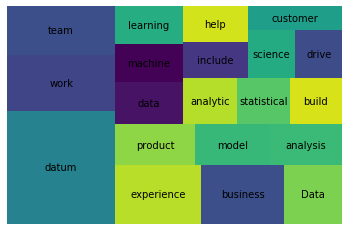

In [27]:
import squarify

top_20 = wc[wc['rank'] <= 20]

squarify.plot(top_20['pct_total'], label=top_20['word'])
plt.axis('off')
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [40]:
tfidf = TfidfVectorizer(stop_words='english', min_df=0.05, max_df=0.95, ngram_range=(1,2))

tfidf.fit(data)

sparse = tfidf.transform(data)

dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())
 
dtm.head()

,000,10,100,2019,ability,ability work,able,academic,accelerate,accept,...,write,write communication,write verbal,www,year,year experience,year professional,year relevant,year work,york
0,0.0,0.0,0.0,0.0,0.094712,0.0,0.0,0.0,0.0,0.0,...,0.104256,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.035317,0.0,0.0,0.0,0.0,0.0,...,0.116627,0.0,0.0,0.0,0.026449,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.037611,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.157606,0.0,0.0,0.0,0.0,0.0


In [41]:
tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.05, max_df=0.95, ngram_range=(1,2))

tfidf.fit(data)

sparse = tfidf.transform(data)

dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())
 
dtm.head()

,,$,+,+ year,1,10,100,2,2019,3,...,world large,write,write communication,write verbal,year,year experience,year professional,year relevant,year work,york
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.157059,0.0,0.0,...,0.0,0.093047,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.056228,0.065281,0.150801,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.119969,0.0,0.0,0.027838,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.333492,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.035782,0.0,0.0,0.0,0.0,0.0
4,0.289502,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.152811,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [42]:
from sklearn.neighbors import NearestNeighbors

In [43]:
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [52]:
dream_job = ['''
join our energetic small startup looking to revolutionize education. 
''']

In [53]:
search = tfidf.transform(dream_job)

nn.kneighbors(search.todense())

(array([[1.24231519, 1.28898964, 1.31641467, 1.32459658, 1.34181397]]),
 array([[379, 345, 144, 116, 243]]))

In [54]:
data[379]

"ClassDojo vision create modern education system give child Earth 10x well learning experience today plan bring community teacher kid family world community power improve education kids.ta core ClassDojo make decision data science team work closely partner product engineering design research marketing develop business insight actionable recommendation look high perform generalist datum scientist come work alongside interesting impactful problem education.u'll high context cross functional team value learn quickly build modern education system hundred million teacher child family pursue variety problem range understand user ensure invest right growth strategy 180 + country operate grow community empower team find answer work colleague business uncover insight design experiment measure impact ultimately help influence decision making entire company.at rtner product manager engineer marketer designer operator define product strategy direction.entify opportunity growth design analyze produ

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 